# Sentiment Analysis using VaderSentiment

### Load the movie_reviews dataset

In [1]:
import pandas as pd

In [4]:
pd.set_option('display.max_colwidth', None)

In [7]:
df = pd.read_csv('movie_reviews.csv')
df.head(2)

,movie_title,rating,genre,in_theaters_date,movie_info,directors,director_gender,tomatometer_rating,audience_rating,critics_consensus
0,A Dog's Journey,PG,"Drama, Kids & Family",5/17/19,"Bailey (voiced again by Josh Gad) is living the good life on the Michigan farm of his ""boy,"" Ethan (Dennis Quaid) and Ethan's wife Hannah (Marg Helgenberger). He even has a new playmate: Ethan and Hannah's baby granddaughter, CJ. The problem is that CJ's mom, Gloria (Betty Gilpin), decides to take CJ away. As Bailey's soul prepares to leave this life for a new one, he makes a promise to Ethan to find CJ and protect her at any cost. Thus begins Bailey's adventure through multiple lives filled with love, friendship and devotion as he, CJ (Kathryn Prescott), and CJ's best friend Trent (Henry Lau) experience joy and heartbreak, music and laughter, and few really good belly rubs.",Gail Mancuso,female,50,92,"A Dog's Journey is as sentimental as one might expect, but even cynical viewers may find their ability to resist shedding a tear stretched to the puppermost limit."
1,A Dog's Way Home,PG,Drama,1/11/19,"Separated from her owner, a dog sets off on an 400-mile journey to get back to the safety and security of the place she calls home. Along the way, she meets a series of new friends and manages to bring a little bit of comfort and joy to their lives.",Charles Martin Smith,male,60,71,"A Dog's Way Home may not quite be a family-friendly animal drama fan's best friend, but this canine adventure is no less heartwarming for its familiarity."


In [8]:
df.shape

(166, 10)

### Calculate sentiment of all movies (based on movie_info) using vaderSentiment

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [16]:
df.movie_info[0]

'Bailey (voiced again by Josh Gad) is living the good life on the Michigan farm of his "boy," Ethan (Dennis Quaid) and Ethan\'s wife Hannah (Marg Helgenberger). He even has a new playmate: Ethan and Hannah\'s baby granddaughter, CJ. The problem is that CJ\'s mom, Gloria (Betty Gilpin), decides to take CJ away. As Bailey\'s soul prepares to leave this life for a new one, he makes a promise to Ethan to find CJ and protect her at any cost. Thus begins Bailey\'s adventure through multiple lives filled with love, friendship and devotion as he, CJ (Kathryn Prescott), and CJ\'s best friend Trent (Henry Lau) experience joy and heartbreak, music and laughter, and few really good belly rubs.'

In [19]:
sentiment = analyzer.polarity_scores(df.movie_info[0])
print('All scores: ', sentiment)
print('Final Score: ', sentiment['compound'])

All scores:  {'neg': 0.051, 'neu': 0.694, 'pos': 0.255, 'compound': 0.9837}
Final Score:  0.9837


In [20]:
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [23]:
df['sentiment'] = df.movie_info.apply(get_sentiment)
df.head(2)

,movie_title,rating,genre,in_theaters_date,movie_info,directors,director_gender,tomatometer_rating,audience_rating,critics_consensus,sentiment
0,A Dog's Journey,PG,"Drama, Kids & Family",5/17/19,"Bailey (voiced again by Josh Gad) is living the good life on the Michigan farm of his ""boy,"" Ethan (Dennis Quaid) and Ethan's wife Hannah (Marg Helgenberger). He even has a new playmate: Ethan and Hannah's baby granddaughter, CJ. The problem is that CJ's mom, Gloria (Betty Gilpin), decides to take CJ away. As Bailey's soul prepares to leave this life for a new one, he makes a promise to Ethan to find CJ and protect her at any cost. Thus begins Bailey's adventure through multiple lives filled with love, friendship and devotion as he, CJ (Kathryn Prescott), and CJ's best friend Trent (Henry Lau) experience joy and heartbreak, music and laughter, and few really good belly rubs.",Gail Mancuso,female,50,92,"A Dog's Journey is as sentimental as one might expect, but even cynical viewers may find their ability to resist shedding a tear stretched to the puppermost limit.",0.9837
1,A Dog's Way Home,PG,Drama,1/11/19,"Separated from her owner, a dog sets off on an 400-mile journey to get back to the safety and security of the place she calls home. Along the way, she meets a series of new friends and manages to bring a little bit of comfort and joy to their lives.",Charles Martin Smith,male,60,71,"A Dog's Way Home may not quite be a family-friendly animal drama fan's best friend, but this canine adventure is no less heartwarming for its familiarity.",0.9237


### Get 10 most positive movies

In [28]:
df[['movie_title', 'movie_info', 'sentiment']].sort_values(by='sentiment', ascending=False).head(10)

,movie_title,movie_info,sentiment
23,Breakthrough,"BREAKTHROUGH is based on the inspirational true story of one mother's unfaltering love in the face of impossible odds. When Joyce Smith's adopted son John falls through an icy Missouri lake, all hope seems lost. But as John lies lifeless, Joyce refuses to give up. Her steadfast belief inspires those around her to continue to pray for John's recovery, even in the face of every case history and scientific prediction. From producer DeVon Franklin (Miracles from Heaven) and adapted for the screen by Grant Nieporte (Seven Pounds) from Joyce Smith's own book, BREAKTHROUGH is an enthralling reminder that faith and love can create a mountain of hope, and sometimes even a miracle.",0.9915
81,Missing Link,"This April, meet Mr. Link (Galifianakis): 8 feet tall, 630 lbs, and covered in fur, but don't let his appearance fool you... he is funny, sweet, and adorably literal, making him the world's most lovable legend at the heart of Missing Link, the globe-trotting family adventure from LAIKA. Tired of living a solitary life in the Pacific Northwest, Mr. Link recruits fearless explorer Sir Lionel Frost (Jackman) to guide him on a journey to find his long-lost relatives in the fabled valley of Shangri-La. Along with adventurer Adelina Fortnight (Saldana), our fearless trio of explorers encounter more than their fair share of peril as they travel to the far reaches of the world to help their new friend. Through it all, the three learn that sometimes you can find a family in the places you least expect.",0.9909
130,The Laundromat,"When her idyllic vacation takes an unthinkable turn, Ellen Martin (Academy Award winner Meryl Streep) begins investigating a fake insurance policy, only to find herself down a rabbit hole of questionable dealings that can be linked to a Panama City law firm and its vested interest in helping the world's wealthiest citizens amass even larger fortunes. The charming -- and very well-dressed -- founding partners Jürgen Mossack (Academy Award winner Gary Oldman) and Ramón Fonseca (Golden Globe nominee Antonio Banderas) are experts in the seductive ways shell companies and offshore accounts help the rich and powerful prosper. They are about to show us that Ellen's predicament only hints at the tax evasion, bribery and other illicit absurdities that the super wealthy indulge in to support the world's corrupt financial system.",0.9908
48,Five Feet Apart,"Stella Grant (Haley Lu Richardson) is every bit a seventeen-year-old... she's attached to her laptop and loves her best friends. But unlike most teenagers, she spends much of her time living in a hospital as a cystic fibrosis patient. Her life is full of routines, boundaries and self-control -- all of which is put to the test when she meets an impossibly charming fellow CF patient named Will Newman (Cole Sprouse). There's an instant flirtation, though restrictions dictate that they must maintain a safe distance between them. As their connection intensifies, so does the temptation to throw the rules out the window and embrace that attraction. Further complicating matters is Will's potentially dangerous rebellion against his ongoing medical treatment. Stella gradually inspires Will to live life to the fullest, but can she ultimately save the person she loves when even a single touch is off limits?",0.9889
156,UglyDolls,"In the adorably different town of Uglyville, weird is celebrated, strange is special and beauty is embraced as more than simply meets the eye. Here, the free-spirited Moxy (Clarkson) and her UglyDoll friends live every day in a whirlwind of bliss, letting their freak flags fly in a celebration of life and its endless possibilities. In this all-new story, the UglyDolls will go on a journey beyond the comfortable borders of Uglyville. There, they will confront what it means to be different, struggle with their desire to be loved, and ultimately discover that you don't have to be perfect to be amazing because who y

### Get 10 most negative movies

In [29]:
df[['movie_title', 'movie_info', 'sentiment']].sort_values(by='sentiment').head(10)

,movie_title,movie_info,sentiment
7,All Is True,"The year is 1613, Shakespeare is acknowledged as the greatest writer of the age. But disaster strikes when his renowned Globe Theatre burns to the ground, and devastated, Shakespeare returns to Stratford, where he must face a troubled past and a neglected family. Haunted by the death of his only son Hamnet, he struggles to mend the broken relationships with his wife and daughters. In so doing, he is ruthlessly forced to examine his own failings as husband and father. His very personal search for the truth uncovers secrets and lies within a family at war.",-0.9955
148,The Wind,"An unseen evil haunts the homestead in this chilling, folkloric tale of madness, paranoia, and otherworldly terror. Lizzy (Caitlin Gerard) is a tough, resourceful frontierswoman settling a remote stretch of land on the 19th-century American frontier. Isolated from civilization in a desolate wilderness where the wind never stops howling, she begins to sense a sinister presence that seems to be borne of the land itself, an overwhelming dread that her husband (Ashley Zukerman) dismisses as superstition. When a newlywed couple arrives on a nearby homestead, their presence amplifies Lizzy's fears, setting into motion a shocking chain of events. Masterfully blending haunting visuals with pulse-pounding sound design, director Emma Tammi evokes a godforsaken world in which the forces of nature come alive with quivering menace.",-0.9838
83,Nightmare Cinema,"In this twisted horror anthology, five strangers are drawn to an abandoned theater and forced to watch their deepest and darkest fears play out before them. Lurking in the shadows is the Projectionist, who preys upon their souls with his collection of disturbing films. As each reel spins its sinister tale, the characters find frightening parallels to their own lives.",-0.9756
154,Triple Threat,"TRIPLE THREAT, the newest feature from Johnson, is an adrenaline fueled and gritty action thriller starring some of the biggest names in action today. Michael Jai White (BLACK DYNAMITE; UNDISPUTED 2: LAST MAN STANDING), Scott Adkins (Marvel's DOCTOR STRANGE; THE EXPENDABLES 2), Michael Bisping (xXx: RETURN OF XANDER CAGE) star as a group of professional assassins hired to take out a billionaire's daughter who is intent on bringing down a major crime syndicate. A down and out team of mercenaries, played by Tony Jaa (ONG BAK TRILOGY; xXx: RETURN OF XANDER CAGE), Iko Uwais (THE RAID 1 & 2; STAR WARS: THE FORCE AWAKENS) and Tiger Chen (MAN OF TAI CHI), must take on the assassins and stop them before they kill their target. The film co-stars JeeJa Yanin (CHOCOLATE) Michael Wong (Cold War) and Celina Jade (WOLF WARRIOR 2).",-0.9696
11,Angel of Mine,"Noomi Rapace (The Girl with the Dragon Tattoo) stars as a woman on the edge in this intense psychological thriller. Having suffered a tragic loss years earlier, Lizzie (Rapace) is trying to rebuild her life when she suddenly becomes obsessed with a neighbor's daughter, believing the girl to be her own child. As Lizzie's shocking, threatening acts grow increasingly dangerous, they lead to an explosive confrontation with the girl's angry, defensive mother (Yvonne Strahovski, ""The Handmaid's Tale"").",-0.9687
27,Charlie Says,"Three young women were sentenced to death for the infamous Manson murders. Their sentences became life imprisonment when the death penalty was lifted in California. One young graduate student was sent in to teach them. Through her, we witness their transformations as they face the reality of their horrific crimes.",-0.9643
113,The Curse of La Llorona,"In 1970s Los Angeles, La Llorona is stalking the night -- and the children. Ignoring the eerie warning of a troubled mother suspected of child endangerment, a social worker and her own small kids are soon drawn into a frightening supernatural realm. Their only hope to survive La Llorona's deadly wrath may be a disillusioned priest and the mysticism he practices to k

### Compare the counts of positive, negative and neutral movies in dataset

In [35]:
positive_counts = (df['sentiment'] > 0).sum()
negative_counts = (df['sentiment'] < 0).sum()
neutral_counts = (df['sentiment'] == 0).sum()

counts = {
    'positive': positive_counts,
    'negative': negative_counts,
    'neutral': neutral_counts
}

counts

{'positive': np.int64(92), 'negative': np.int64(74), 'neutral': np.int64(0)}

In [36]:
import matplotlib.pyplot as plt

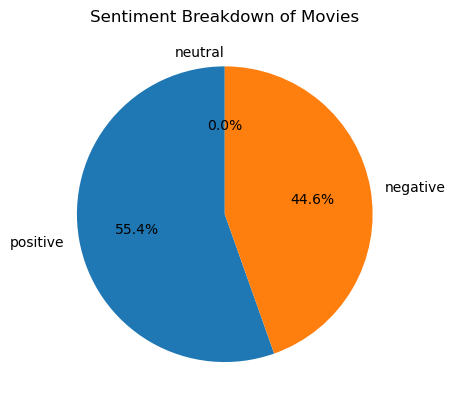

In [45]:
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Breakdown of Movies")
plt.show()

### Save the dataframe with sentiment as a pickle file

In [47]:
df.to_pickle('movie_reviews_with_sentiment.pkl')